In [1]:
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from nltk import FreqDist

In [2]:
data = pd.read_csv("./data/meia_data.csv")
data = data.drop(columns=["Town","Region","Type"])

## 1. Descripcion del Corpus

In [3]:
documentos = data["Review"].tolist()
corpus = " ".join(documentos)
n = len(documentos)

In [4]:
tokenizer = RegexpTokenizer(r'[a-zA-ZáéíóúñÁÉÍÓÚÑ]+')
doc_tokens = [tokenizer.tokenize(doc) for doc in documentos]
tokens = [token for token in tokenizer.tokenize(corpus)]
vocab = set(tokens)
print(f"Numero de documentos: {n}")
print(f"Numero de tokens en el corpus: {len(tokens)}")
print(f"Numero de palabras en el vocabulario: {len(vocab)}")


Numero de documentos: 5000
Numero de tokens en el corpus: 350871
Numero de palabras en el vocabulario: 22319


In [5]:
# Punto 2
# Hapax legomena y su proporcion.
fdist = FreqDist(tokens)
hapax_legomena = [word for word, freq in fdist.items() if freq == 1]
print(f"Numero de hapax legomena: {len(hapax_legomena)}")
print(f"Proporcion de hapax legomena con el vocabulario: {len(hapax_legomena) / len(vocab) * 100 if vocab else 0:.3f}%")
for hapax in hapax_legomena:
    print(f" - {hapax}")


Numero de hapax legomena: 11671
Proporcion de hapax legomena con el vocabulario: 52.292%
 - apuran
 - descuidaron
 - pesas
 - frustrado
 - acanalado
 - elástico
 - ceñir
 - púrpura
 - cintura
 - blye
 - rechazada
 - Josr
 - whistband
 - sesión
 - olvídate
 - verte
 - cofradia
 - reposa
 - resguardar
 - temrinabamos
 - vacia
 - Adicionalmente
 - aglomeran
 - servician
 - Hanger
 - abrigo
 - reemplazado
 - incita
 - bastó
 - fort
 - denuncia
 - Ceviche
 - inspiraron
 - losa
 - Doble
 - corregida
 - Hook
 - katching
 - adornan
 - Kukulkan
 - Fa
 - perspicaz
 - permanecerá
 - deshechos
 - riccomand
 - bouilding
 - multicolor
 - betabel
 - nisiquiera
 - racismo
 - divididos
 - dividíamos
 - XBULU
 - sep
 - oct
 - diwnside
 - econimical
 - esperáramos
 - Pix
 - sobreviviente
 - azotó
 - Kai
 - intensión
 - mariguana
 - groserías
 - msma
 - panteones
 - menis
 - Morales
 - Señorita
 - sumar
 - vasi
 - ofertaron
 - bureau
 - vaporizaciones
 - poliéster
 - enlatado
 - ordenara
 - apareciera
 - 

In [6]:
## Parte 3. Porcentaje de stopwords
from nltk.corpus import stopwords

spanish_stopwords = stopwords.words('spanish')

contador_stopwords = 0

for token in tokens:
    if token.lower() in spanish_stopwords:
        contador_stopwords += 1

print(f"Porcentaje de stopwords: {contador_stopwords / len(tokens) * 100 if tokens else 0:.3f}%")

Porcentaje de stopwords: 50.369%


In [7]:
## Parte 4. Estadisticas por clase
for polarity in sorted(data['Polarity'].unique()):
    df_reducido = data.loc[data['Polarity'] == polarity, 'Review'].tolist()
    corpus_reducido = ' '.join(df_reducido)
    n = len(df_reducido)
    tokens_r = tokenizer.tokenize(corpus_reducido)
    vocab_r = set(tokens_r)

    print(f"Estadisticas para la polaridad {polarity}:")
    print(f" - Cantidad de textos: {n}")
    print(f" - Cantidad de palabras: {len(tokens_r)}")
    print(f" - Cantidad de palabras en el vocabulario: {len(vocab_r)}")

Estadisticas para la polaridad 1.0:
 - Cantidad de textos: 800
 - Cantidad de palabras: 62249
 - Cantidad de palabras en el vocabulario: 8609
Estadisticas para la polaridad 2.0:
 - Cantidad de textos: 900
 - Cantidad de palabras: 75380
 - Cantidad de palabras en el vocabulario: 9323


Estadisticas para la polaridad 3.0:
 - Cantidad de textos: 1000
 - Cantidad de palabras: 69868
 - Cantidad de palabras en el vocabulario: 8444
Estadisticas para la polaridad 4.0:
 - Cantidad de textos: 1100
 - Cantidad de palabras: 68992
 - Cantidad de palabras en el vocabulario: 8204
Estadisticas para la polaridad 5.0:
 - Cantidad de textos: 1200
 - Cantidad de palabras: 74382
 - Cantidad de palabras en el vocabulario: 9334


## 2. Ley de Zipf

In [8]:
## Calcular la frecuencia absoluta de cada palabra en el corpus y asignar rango
palabras = []
rango = list(range(1, len(fdist) + 1))
for palabra, _ in sorted(fdist.items(), key=lambda item: item[1], reverse=True):
    palabras.append(palabra)
    
freq_palabras = [fdist[palabra] for palabra in palabras]

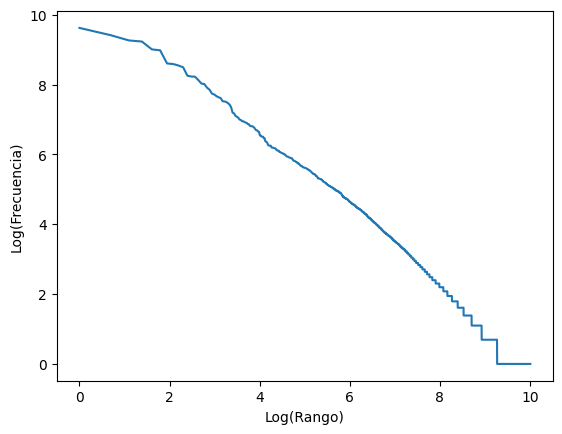

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

log_freq_palabras = np.log(freq_palabras)
log_ranking = np.log(rango)

fig, ax = plt.subplots()

sns.lineplot(x=log_ranking, y=log_freq_palabras, ax=ax)
ax.set_xlabel("Log(Rango)")
ax.set_ylabel("Log(Frecuencia)")
plt.show(ax)

In [10]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(log_ranking.reshape(-1, 1), log_freq_palabras.reshape(-1, 1))

m = linreg.coef_[0][0]
b = linreg.intercept_[0]
print(f"Pendiente: {m}, Interseccion: {b}")

Pendiente: -1.2334549048028804, Interseccion: 11.982853383709413


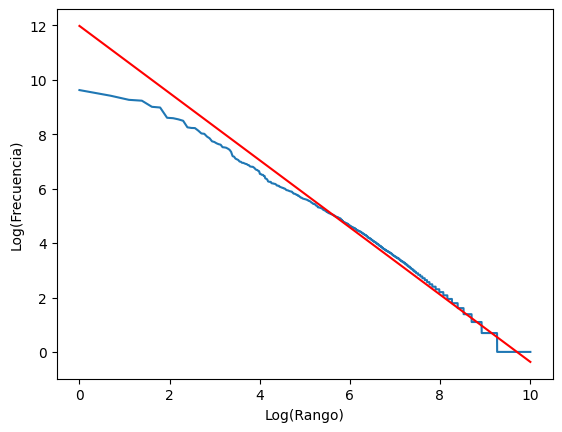

In [11]:
y_reg = linreg.predict(log_ranking.reshape(-1,1))
fig, ax = plt.subplots()

sns.lineplot(x=log_ranking, y=log_freq_palabras, ax=ax)
ax.set_xlabel("Log(Rango)")
ax.set_ylabel("Log(Frecuencia)")
sns.lineplot(x=log_ranking, y=y_reg.flatten(), color='red', ax=ax)
plt.show(ax)

In [12]:
C = np.exp(b)
s = -m

print(f"Constante de normalizacion: {C}. Frecuencia de la palabra mas comun: {fdist[palabras[0]]}")

print(f"Exponente de la ley de Zipf: {s}")


### Discutir por que.

Constante de normalizacion: 159987.88677750676. Frecuencia de la palabra mas comun: 15131
Exponente de la ley de Zipf: 1.2334549048028804


## 3. Palabras importantes por clase

In [13]:
def normalizar_texto(texto:str) -> str:
    texto = texto.lower()
    tokens = tokenizer.tokenize(texto)
    tokens_normalizados = [token for token in tokens if token not in spanish_stopwords]
    return " ".join(tokens_normalizados)

data_normalizada = data.copy()
data_normalizada["Review"] = data_normalizada["Review"].apply(normalizar_texto)


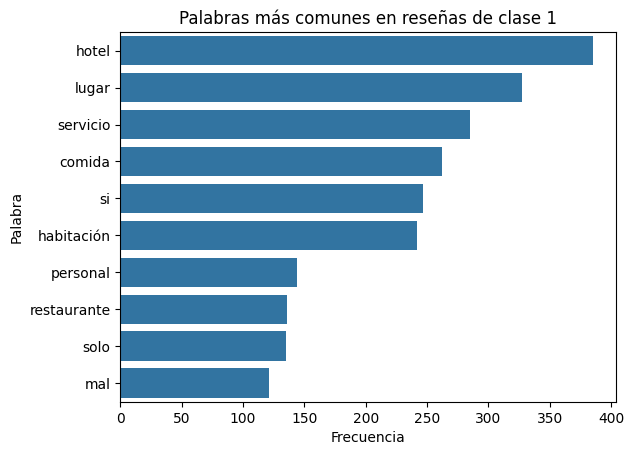

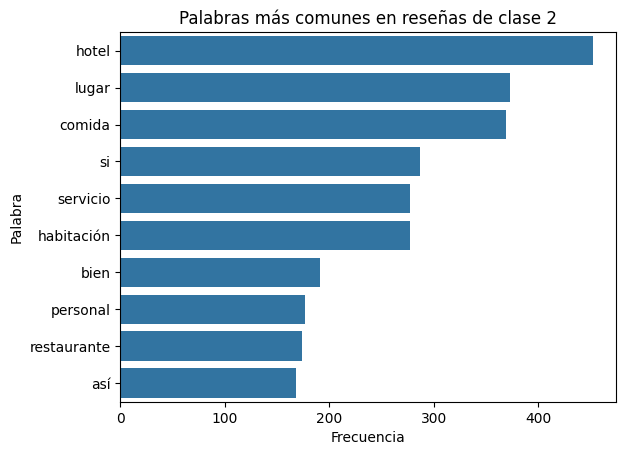

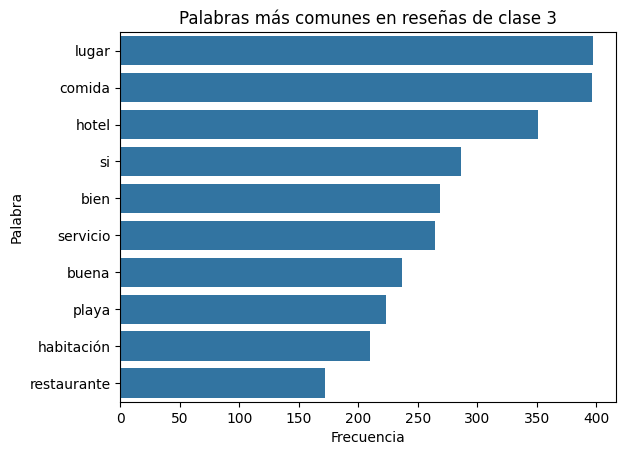

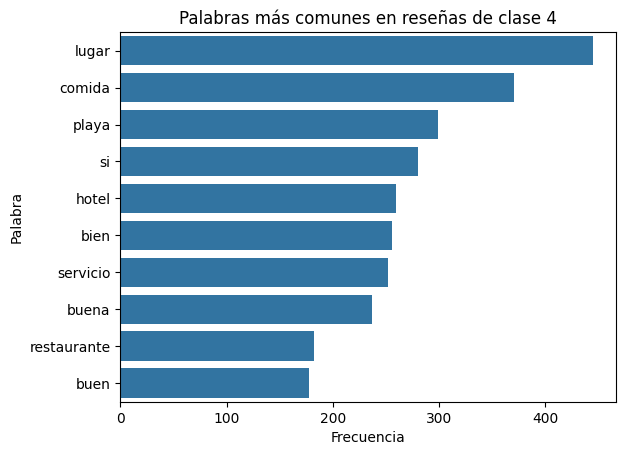

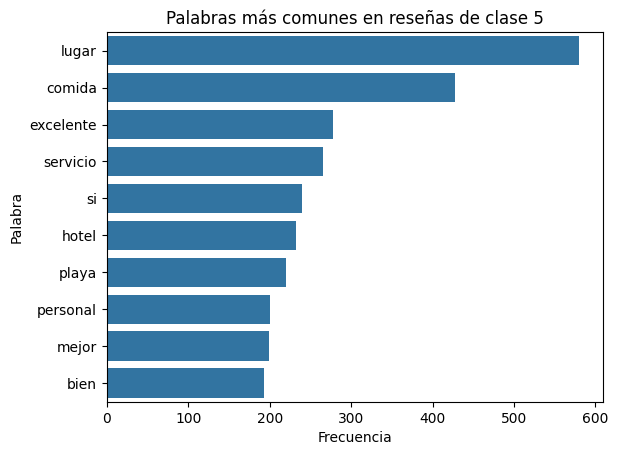

In [14]:
# Palabras mas utilizadas por clase
for clase in sorted(data_normalizada["Polarity"].unique()):
    corpus_r = data_normalizada.loc[data_normalizada["Polarity"] == clase,"Review"].tolist()
    
    tokens_r = [word for review in corpus_r for word in tokenizer.tokenize(review)]
    freq = FreqDist(tokens_r)

    palabra_array = []
    frecuencia_array = []
    for palabra, frecuencia in freq.most_common(10):
        palabra_array.append(palabra)
        frecuencia_array.append(frecuencia)

    sns.barplot(x=frecuencia_array, y=palabra_array, orient="h")
    plt.title(f"Palabras más comunes en reseñas de clase {clase:.0f}")
    plt.xlabel("Frecuencia")
    plt.ylabel("Palabra")
    plt.savefig(f"./figures/palabras_comunes_clase_{clase:.0f}.png", bbox_inches='tight')
    plt.show()


## 4. Patrones gramaticales (POS tagging)

In [15]:
import spacy
#!python -m spacy download es_core_news_sm
nlp = spacy.load("es_core_news_sm")

In [16]:
def aplicar_pos_tagging(texto):
    doc = nlp(texto)
    return " ".join([token.pos_ for token in doc])

# Utilizamos el corpus sin preprocesar para mantener la gramatica.
data["pos"] = data["Review"].apply(aplicar_pos_tagging)

In [17]:
def get_ngrams(text, n=4):
    """
    Toma una cadena de texto, la divide en tokens y devuelve una lista de n-gramas.
    """
    tokens = text.split()
    if len(tokens) < n:
        return []
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

In [18]:
from itertools import chain
from collections import Counter

data["tetragram"] = data["pos"].apply(lambda x: get_ngrams(x, n=4))

In [19]:
data["tetragram"]

0       [DET PROPN PRON VERB, PROPN PRON VERB ADP, PRO...
1       [VERB NUM NOUN ADP, NUM NOUN ADP DET, NOUN ADP...
2       [DET NOUN CCONJ PRON, NOUN CCONJ PRON PRON, CC...
3       [DET ADJ NOUN AUX, ADJ NOUN AUX ADV, NOUN AUX ...
4       [SCONJ VERB DET NOUN, VERB DET NOUN ADP, DET N...
                              ...                        
4995    [NOUN ADJ PUNCT NOUN, ADJ PUNCT NOUN ADP, PUNC...
4996    [DET PROPN ADV VERB, PROPN ADV VERB ADP, ADV V...
4997    [ADJ NOUN ADP PRON, NOUN ADP PRON PRON, ADP PR...
4998    [DET NOUN ADP NOUN, NOUN ADP NOUN ADV, ADP NOU...
4999    [PRON VERB ADP DET, VERB ADP DET NOUN, ADP DET...
Name: tetragram, Length: 5000, dtype: object

In [20]:
# Obtener los tetragramas más comunes para cada clase
class_counts = {}
for cls in sorted(data['Polarity'].unique()):
    class_df = data[data['Polarity'] == cls]

    all_tetragrams = list(chain.from_iterable(class_df['tetragram']))
    counter = Counter(all_tetragrams)
    class_counts[cls] = counter.most_common(5)
    
for cls, common_tetragrams in class_counts.items():
    print(f"\nLos 5 tetragramas más comunes para la clase {cls:.0f} son:")
    for tetragram, count in common_tetragrams:
        print(f"- '{tetragram}' : {count} veces")


Los 5 tetragramas más comunes para la clase 1 son:
- 'NOUN ADP DET NOUN' : 817 veces
- 'ADP DET NOUN PUNCT' : 772 veces
- 'VERB ADP DET NOUN' : 683 veces
- 'DET NOUN ADP NOUN' : 670 veces
- 'ADP DET NOUN ADP' : 524 veces

Los 5 tetragramas más comunes para la clase 2 son:
- 'NOUN ADP DET NOUN' : 1145 veces
- 'ADP DET NOUN PUNCT' : 977 veces
- 'DET NOUN ADP NOUN' : 869 veces
- 'DET NOUN ADP DET' : 762 veces
- 'ADP DET NOUN ADP' : 746 veces

Los 5 tetragramas más comunes para la clase 3 son:
- 'NOUN ADP DET NOUN' : 1070 veces
- 'ADP DET NOUN PUNCT' : 902 veces
- 'DET NOUN ADP NOUN' : 830 veces
- 'DET NOUN ADP DET' : 701 veces
- 'ADP DET NOUN ADP' : 678 veces

Los 5 tetragramas más comunes para la clase 4 son:
- 'NOUN ADP DET NOUN' : 1095 veces
- 'ADP DET NOUN PUNCT' : 890 veces
- 'DET NOUN ADP NOUN' : 839 veces
- 'ADP DET NOUN ADP' : 781 veces
- 'DET NOUN ADP DET' : 716 veces

Los 5 tetragramas más comunes para la clase 5 son:
- 'NOUN ADP DET NOUN' : 1080 veces
- 'ADP DET NOUN PUNCT' : 

## 5. Representaciones BoW

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

tfidf_vectorizer = TfidfVectorizer()
count_vectorizer = CountVectorizer()

In [34]:
X_tfidf = tfidf_vectorizer.fit_transform(data["Review"]).toarray()
X_tf = count_vectorizer.fit_transform(data["Review"]).toarray()
y = data["Polarity"].values

In [38]:
tfidf_features = tfidf_vectorizer.get_feature_names_out()
tf_features = count_vectorizer.get_feature_names_out()

In [35]:
X_tfidf.shape

(5000, 19970)

In [21]:
from sklearn.feature_selection import chi2

def get_chi2_n_mi(X, y):
    chi2_scores, p_values = chi2(X, y)

    return chi2_scores, p_values

In [ ]:
tf_chi2, tf_p = get_chi2_n_mi(X_tf, y)
tfidf_chi2, tfidf_p = get_chi2_n_mi(X_tfidf, y)

In [45]:
from sklearn.feature_selection import SelectKBest

# Select the top 20 features using Chi-Squared
k = 20

tf_selector_chi2 = SelectKBest(chi2, k=k)
X_new_chi2 = tf_selector_chi2.fit_transform(X_tf, y)

tfidf_selector_chi2 = SelectKBest(chi2, k=k)
X_new_tfidf_chi2 = tfidf_selector_chi2.fit_transform(X_tfidf, y)

# Get the indices of the selected features
tf_selected_features_indices = tf_selector_chi2.get_support(indices=True)
tfidf_selected_features_indices = tfidf_selector_chi2.get_support(indices=True)

# Map indices back to feature names
top_features_tf_chi2 = [tf_features[i] for i in tf_selected_features_indices]
top_features_tfidf_chi2 = [tfidf_features[i] for i in tfidf_selected_features_indices]

print(f"Top {k} features by Chi-Squared (TF): {top_features_tf_chi2}")
print(f"Top {k} features by Chi-Squared (TF-IDF): {top_features_tfidf_chi2}")

Top 20 features by Chi-Squared (TF): ['cuando', 'dijeron', 'excelente', 'habitación', 'había', 'hotel', 'increíble', 'la', 'mal', 'mala', 'me', 'nada', 'ni', 'no', 'nos', 'peor', 'pero', 'por', 'pésimo', 'que']
Top 20 features by Chi-Squared (TF-IDF): ['buen', 'deliciosa', 'dijeron', 'excelente', 'gracias', 'habitación', 'horrible', 'increíble', 'mal', 'mala', 'nada', 'ni', 'no', 'peor', 'pero', 'pésima', 'pésimo', 'que', 'regular', 'terrible']


In [46]:
contador_tf = 0
contador_tfidf = 0

for i in range(20):
    if top_features_tf_chi2[i] in spanish_stopwords:
        contador_tf += 1
    if top_features_tfidf_chi2[i] in spanish_stopwords:
        contador_tfidf += 1

print(f"Stopwords TF: {contador_tf}")
print(f"Stopwords TF-IDF: {contador_tfidf}")


Stopwords TF: 11
Stopwords TF-IDF: 5


## 6. Bigramas

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

tfidf_vectorizer = TfidfVectorizer(ngram_range=(2,2))
count_vectorizer = CountVectorizer(ngram_range=(2,2))

In [23]:
X_tfidf = tfidf_vectorizer.fit_transform(data["Review"]).toarray()
X_tf = count_vectorizer.fit_transform(data["Review"]).toarray()
y = data["Polarity"].values

In [24]:
tfidf_features = tfidf_vectorizer.get_feature_names_out()
tf_features = count_vectorizer.get_feature_names_out()

In [25]:
tf_chi2, tf_p = get_chi2_n_mi(X_tf, y)
tfidf_chi2, tfidf_p = get_chi2_n_mi(X_tfidf, y)

In [26]:
from sklearn.feature_selection import SelectKBest

# Select the top 20 features using Chi-Squared
k = 20

tf_selector_chi2 = SelectKBest(chi2, k=k)
X_new_chi2 = tf_selector_chi2.fit_transform(X_tf, y)

tfidf_selector_chi2 = SelectKBest(chi2, k=k)
X_new_tfidf_chi2 = tfidf_selector_chi2.fit_transform(X_tfidf, y)

# Get the indices of the selected features
tf_selected_features_indices = tf_selector_chi2.get_support(indices=True)
tfidf_selected_features_indices = tfidf_selector_chi2.get_support(indices=True)

# Map indices back to feature names
top_features_tf_chi2 = [tf_features[i] for i in tf_selected_features_indices]
top_features_tfidf_chi2 = [tfidf_features[i] for i in tfidf_selected_features_indices]

print(f"Top {k} features by Chi-Squared (TF): {top_features_tf_chi2}")
print(f"Top {k} features by Chi-Squared (TF-IDF): {top_features_tfidf_chi2}")

Top 20 features by Chi-Squared (TF): ['dijeron que', 'dijo que', 'este hotel', 'excelente servicio', 'la habitación', 'las ruinas', 'me dijeron', 'muy mal', 'muy mala', 'ni siquiera', 'no es', 'no había', 'no hay', 'no lo', 'nos dijeron', 'pero no', 'pésimo servicio', 'que no', 'sin embargo', 'un poco']
Top 20 features by Chi-Squared (TF-IDF): ['comida deliciosa', 'comida no', 'dijeron que', 'dijo que', 'el peor', 'es buena', 'excelente servicio', 'la habitación', 'mal servicio', 'mala experiencia', 'muy mal', 'muy mala', 'ni siquiera', 'no es', 'no había', 'no lo', 'nos dijeron', 'pésimo servicio', 'sin embargo', 'un poco']


In [27]:
contador_tf = 0
contador_tfidf = 0

for i in range(20):
    
    if top_features_tf_chi2[i].split()[0] in spanish_stopwords:
        contador_tf += 1
    if top_features_tf_chi2[i].split()[1] in spanish_stopwords:
        contador_tf += 1
    if top_features_tfidf_chi2[i].split()[0] in spanish_stopwords:
        contador_tfidf += 1
    if top_features_tfidf_chi2[i].split()[1] in spanish_stopwords:
        contador_tfidf += 1

print(f"Stopwords TF: {contador_tf}")
print(f"Stopwords TF-IDF: {contador_tfidf}")

Stopwords TF: 25
Stopwords TF-IDF: 19


In [30]:
intr = set(top_features_tf_chi2).intersection(set(top_features_tfidf_chi2))
len(intr)

solo_tf = set(top_features_tf_chi2) - set(top_features_tfidf_chi2)
solo_tfidf = set(top_features_tfidf_chi2) - set(top_features_tf_chi2)

print(f"Solo en TF: {solo_tf}")
print(f"Solo en TF-IDF: {solo_tfidf}")

Solo en TF: {'este hotel', 'no hay', 'pero no', 'me dijeron', 'que no', 'las ruinas'}
Solo en TF-IDF: {'mal servicio', 'el peor', 'comida deliciosa', 'es buena', 'comida no', 'mala experiencia'}


## 7. Word2Vec y analogias

In [32]:
from gensim.models import Word2Vec

In [33]:
w2v = Word2Vec(sentences=doc_tokens, vector_size=50, window=2, min_count=1, sg=1)

In [34]:
def get_analogies(model: Word2Vec, positive, negative):
    """
    Obtiene las palabras más similares a una palabra dada, utilizando un modelo de Word2Vec.
    """
    return model.wv.most_similar(positive=positive, negative=negative)


In [39]:
analogies = get_analogies(w2v, positive=['habitacion','restaurante'], negative=['hotel'])
print(analogies)

[('cocina', 0.9141219854354858), ('pizza', 0.9101781249046326), ('bebida', 0.9066370725631714), ('carta', 0.9054568409919739), ('recepcion', 0.905124843120575), ('camarera', 0.9047081470489502), ('conexión', 0.9015212059020996), ('señal', 0.9012066125869751), ('temperatura', 0.9005813598632812), ('cabaña', 0.8981835246086121)]


In [43]:
analogies = get_analogies(w2v, positive=['comida','deliciosa'], negative=['restaurante'])
print(analogies)

[('Comida', 0.7934045791625977), ('carne', 0.7874050140380859), ('presentación', 0.7836872339248657), ('pizza', 0.7748273611068726), ('sopa', 0.774335503578186), ('relación', 0.7636380195617676), ('regular', 0.7628732919692993), ('carta', 0.76209956407547), ('selección', 0.7595122456550598), ('mala', 0.7568337917327881)]


In [ ]:
analogies = get_analogies(w2v, positive=['','piscina'], negative=['hotel'])
print(analogies)

[('ropa', 0.8667237162590027), ('alberca', 0.8654630184173584), ('n', 0.8550732135772705), ('cerveza', 0.8508403301239014), ('arena', 0.8479333519935608), ('tienda', 0.8398812413215637), ('conexión', 0.83894944190979), ('cultura', 0.8375711441040039), ('subida', 0.8373114466667175), ('Laguna', 0.8369067907333374)]
